<a href="https://colab.research.google.com/github/w1786817/StreamLit_App/blob/main/Twitter_Analysis_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook contains all python codes before deployment in StreamLit App


Upload before running:
*   collected_tweets.csv
*   random_forest_model.pkl
*   tfidf_vectonizer.pk

Download from Repository:
https://github.com/w1786817/StreamLit_App/tree/main

If the code doesn't run, upload mannually







In [ ]:
!wget -q https://github.com/w1786817/StreamLit_App/raw/main/collected_tweets.csv
!wget -q https://github.com/w1786817/StreamLit_App/raw/main/random_forest_model.pkl
!wget -q https://github.com/w1786817/StreamLit_App/raw/main/tfidf_vectorizer.pkl

## **Query Generation**

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag, ne_chunk
import random

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

# Step 1: Extract named entities from the prompt
def extract_entities(prompt):
    words = word_tokenize(prompt)
    pos_tags = pos_tag(words)
    tree = ne_chunk(pos_tags, binary=False)

    entities = []
    for subtree in tree:
        if hasattr(subtree, 'label') and subtree.label() in ['PERSON', 'GPE', 'ORGANIZATION']:
            entity = ' '.join([leaf[0] for leaf in subtree.leaves()])
            entities.append(entity)

    return entities

# Step 2: Generate possible hashtags
def generate_hashtags(entities):
    hashtags = []
    for entity in entities:
        parts = entity.split()
        if len(parts) > 1:
            hashtags.append(f"#Find{parts[0]}{parts[1]}")
            hashtags.append(f"#{parts[0]}Missing")
            hashtags.append(f"#HelpFind{parts[0]}{parts[1]}")
            hashtags.append(f"#{parts[0]}{parts[1]}Search")
        else:
            hashtags.append(f"#Find{entity}")
            hashtags.append(f"#{entity}Missing")
            hashtags.append(f"#HelpFind{entity}")
            hashtags.append(f"#{entity}Search")

    return hashtags

# Step 3: Expand key terms with synonyms
def expand_with_synonyms(term):
    synonyms = set()
    for syn in wn.synsets(term):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

# Step 4: Construct the query
def generate_query(prompt):
    # Extract entities
    entities = extract_entities(prompt)

    # Generate hashtags and synonyms
    hashtags = generate_hashtags(entities)
    keywords = expand_with_synonyms('find') + expand_with_synonyms('seen')

    # Construct the query
    base_query = f"{prompt} AND " + " OR ".join(hashtags)
    synonym_query = " OR ".join(keywords)
    complete_query = base_query + " OR " + synonym_query

    return complete_query

# Example usage
prompt = "Nikol Angelova"
query = generate_query(prompt)

print(f"Generated Query: {query}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Generated Query: Nikol Angelova AND #FindNikol OR #NikolMissing OR #HelpFindNikol OR #NikolSearch OR #FindAngelova OR #AngelovaMissing OR #HelpFindAngelova OR #AngelovaSearch OR notice OR witness OR see OR incur OR detect OR get hold OR happen OR uncovering OR find out OR feel OR get OR discover OR find oneself OR obtain OR encounter OR find OR line up OR regain OR rule OR retrieve OR recover OR determine OR observe OR bump OR chance OR receive OR ascertain OR breakthrough OR come up OR discovery OR visit OR get word OR run into OR come across OR figure OR see to it OR witness OR see OR image OR pick up OR realise OR assure OR visualize OR go steady OR understand OR take care OR control OR attend OR find out OR visualise OR consider OR check OR discover OR get wind OR realize OR view OR go through OR encounter OR find OR watch OR look OR fancy OR learn OR hear OR interpret OR ensure OR project OR meet OR construe OR get a line OR reckon OR catch OR date OR picture OR determine OR exper

# Tweets Collection Code
DO NOT RUN THIS CODE
THIS IS AN EXAMPLE CODE

In [ ]:
#!!! DO NOT RUN THIS CODE!!! API Restrictions
!pip install git+https://github.com/tweepy/tweepy.git
import tweepy
import datetime as dt

# Authentication with Twitter API

api_key = "API_KEY"
api_secret_key = "User_Secret_Key"
access_token = "ACCESS_TOKEN"
access_token_secret = "ACESS_TOKEN_SECRET"

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Defined the search query and data range
start_date = "2023-08-01"
end_date = "2023-08-10"
no_of_tweets = 1000
try:
    # Fetch tweets within the specified date range
    tweets = tweepy.Cursor(api.search_tweets,
                           q=query,
                           lang="en",
                           since=start_date,
                           until=end_date,
                           tweet_mode='extended').items(no_of_tweets)

    # Collect all attributes (convert each tweet object to a dictionary)
    tweets_data = [tweet._json for tweet in tweets]


    # Save the DataFrame to a CSV file
    tweets_df.to_csv('tweets.csv', index=False)
    print("Tweets have been saved to 'tweets.csv'")

except BaseException as e:
    print('Status Failed On,',str(e))

# Normalization for collexted tweets

In [ ]:
import pandas as pd

import json



# Step 1: Read the CSV file with collected tweets

file_path = '/content/collected_tweets.csv'

df = pd.read_csv(file_path)

# Step 2: Parse JSON data from the 'Tweet JSON' column

df['Tweet JSON'] = df['Tweet JSON'].apply(json.loads)


# Step 3: Normalize the JSON data

# Convert the JSON data into a DataFrame

json_df = pd.json_normalize(df['Tweet JSON'])

df = df.drop(columns=['Tweet JSON'])

# Concatenate the normalized JSON DataFrame with the original DataFrame

final_df = pd.concat([df, json_df], axis=1)

# Display the final DataFrame

print(final_df.iloc[0])

created_at                                           Fri Aug 04 14:55:03 +0000 2023
id                                                              2234524512197533680
id_str                                                          1867592415828398267
full_text                         I'm tired of hearing about #NikolAngelova. Why...
truncated                                                                     False
                                                        ...                        
place.full_name                                                    Somewhere, World
place.country_code                                                               GB
place.country                                                        United Kingdom
place.bounding_box.type                                                     Polygon
place.bounding_box.coordinates    [[[-1.17432, 52.355517], [-1.17432, 52.355517]...
Name: 0, Length: 82, dtype: object


# Twitter User's Awarness Map

In [ ]:
import pandas as pd
import folium

#Extract latitude and longitude stored in geo.coordinates attribute
final_df['latitude'] = final_df['geo.coordinates'].apply(lambda x: x[0] if isinstance(x, list) else None)
final_df['longitude'] = final_df['geo.coordinates'].apply(lambda x: x[1] if isinstance(x, list) else None)

# Drop rows with missing geospatial data
final_df = final_df.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered at the average coordinates
map_center = [final_df['latitude'].mean(), final_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add markers to the map for each tweet
for lat, lon in zip(final_df['latitude'], final_df['longitude']):
    folium.Marker(location=[lat, lon]).add_to(m)

# Save the map to an HTML file
m.save('/content/missing_person_awareness_map.html')

from IPython.display import display
display(m)

# Sentiment Analysis with VADER


In [ ]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

df = final_df  # Adjust the DataFrame name if necessary

def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_tweet'] = df['full_text'].apply(clean_tweet)

sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sid.polarity_scores(text)

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment_score)

def categorize_sentiment(sentiment):
    compound = sentiment['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound > -0.05:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

sentiment_counts = df['sentiment_category'].value_counts()
print(sentiment_counts)

df['is_negative_or_spammy'] = df['sentiment_category'] == 'Negative'
cleaned_df = df[~df['is_negative_or_spammy']]
cleaned_df = cleaned_df.drop(columns=['cleaned_tweet', 'sentiment', 'is_negative_or_spammy'])
cleaned_df.to_csv('cleaned_tweets.csv', index=False)

print("Cleaned dataset saved as 'cleaned_tweets.csv'.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


sentiment_category
Positive    958
Negative     42
Name: count, dtype: int64
Cleaned dataset saved as 'cleaned_tweets.csv'.


# Sentiment Analysis with BERT

In [ ]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

# Function to preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Load model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Function to classify sentiment using the model
def classify_sentiment(text):
    text = preprocess(text)  # Ensure text is preprocessed
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

# Map the sentiment scores to binary values
def map_sentiment_to_binary(scores):
    max_score_idx = np.argmax(scores)  # Get the index of the highest score
    # Labels: 0 -> Negative, 1 -> Neutral, 2 -> Positive
    if max_score_idx in [1, 2]:  # Neutral or Positive sentiment
        return 0  # Keep these tweets
    elif max_score_idx == 0:  # Negative sentiment
        return 1  # Filter out these tweets
    else:
        return 1  # Default to filtering out if unsure

final_df['full_text'] = final_df['full_text'].apply(preprocess)

# Apply the sentiment analysis pipeline to the 'cleaned_text' column
final_df['predicted_tone'] = final_df['full_text'].apply(lambda x: map_sentiment_to_binary(classify_sentiment(x)))

# Filter out only the negative tweets
filtered_df = final_df[final_df['predicted_tone'] == 0]  # Keep only positive/neutral tweets

# Display the filtered DataFrame and count
print(f"Number of positive/neutral tweets: {filtered_df.shape[0]}")

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Number of positive/neutral tweets: 950


# Classification of Tweets for Relevant/Irrelevant
The code will run only if Sentiment Analysis is performed first to use the predicted_tweets.csv !!!


In [ ]:
from joblib import dump, load
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the clean_text function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

    # Load the RandomForest model and TF-IDF vectorizer when needed
classifier = load('random_forest_model.pkl')
vectorizer = load('tfidf_vectorizer.pkl')

# Use the model to predict new data
new_data = pd.read_csv('cleaned_tweets.csv')
new_data['cleaned_text'] = new_data['full_text'].apply(clean_text)
new_data_tfidf = vectorizer.transform(new_data['cleaned_text'])
new_data['predicted_label'] = classifier.predict(new_data_tfidf)

important_tweets_count = (new_data['predicted_label'] == 1).sum()

print(f"Number of important tweets with predicted label 1: {important_tweets_count}")
# Save the predictions
new_data.to_csv('new_predicted_tweets.csv', index=False)

Number of important tweets with predicted label 1: 365


# NER Analysis for Locations with possible sightings

In [ ]:
#test
import spacy
import pandas as pd
import re
from nltk.corpus import wordnet as wn
import nltk

# Load necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load a pre-trained NER model (spaCy's 'en_core_web_sm' model includes NER)
nlp = spacy.load('en_core_web_sm')

# Load the dataset
relevant_tweets_df = final_df.copy()


# Function to expand keywords with synonyms using WordNet
def expand_keywords_with_synonyms(keywords):
    synonyms = set(keywords)
    for keyword in keywords:
        for syn in wn.synsets(keyword):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name().replace('_', ' '))  # Replace underscores in multi-word synonyms
    return list(synonyms)

# Initial sighting-specific keywords
sighting_keywords = ['saw', 'spotted', 'last seen', 'just saw', 'seen near', 'sighted in', 'witnessed', 'noticed']

# Expand the keywords to include synonyms
expanded_sighting_keywords = expand_keywords_with_synonyms(sighting_keywords)

# Create a regex pattern for the expanded keywords
sighting_keywords_pattern = re.compile(r'\b(' + '|'.join(expanded_sighting_keywords) + r')\b', re.IGNORECASE)

# Function to split camel case (e.g., #JohnDoeMissing -> John Doe Missing)
def split_camel_case(hashtag):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', hashtag)

# Updated function to identify sightings and handle hashtags
def identify_sightings_and_locations(text):
    # Find all hashtags
    hashtags = re.findall(r'#\w+', text)

    # Split hashtags and add them to the text
    split_hashtags = ' '.join([split_camel_case(h) for h in hashtags])

    # Combine original text with split hashtags
    combined_text = text + ' ' + split_hashtags

    # Process combined text with SpaCy NER
    doc = nlp(combined_text)

    # Extract locations from text
    locations = [ent.text for ent in doc.ents if ent.label_ == 'GPE']  # 'GPE' stands for Geopolitical Entity

    # Check if the text contains expanded sighting keywords and has any identified locations
    if sighting_keywords_pattern.search(combined_text) and locations:
        return locations  # Return the list of locations if keywords are found and locations are present
    else:
        return []  # Return an empty list if no relevant keywords or locations

# Apply the function to identify locations only for sighting-related tweets
relevant_tweets_df['sighting_locations'] = relevant_tweets_df['full_text'].apply(identify_sightings_and_locations)

# Filter out only the rows where sightings were identified (non-empty sighting_locations)
sightings_df = relevant_tweets_df[relevant_tweets_df['sighting_locations'].apply(lambda x: len(x) > 0)].copy()

# Combine the sighting locations with the date and time
sightings_df['location_time'] = sightings_df.apply(lambda row: list(zip(row['sighting_locations'], [row['created_at']] * len(row['sighting_locations']))), axis=1)

# Display the DataFrame with the filtered sighting locations and times
print(sightings_df[['full_text', 'sighting_locations', 'location_time']])

#date_format = '%a %b %d %H:%M:%S %z %Y'
# Combine the sighting locations with the date and time
#sightings_df['location_time'] = sightings_df.apply(lambda row: list(zip(row['sighting_locations'], [row['created_at']] * len(row['sighting_locations']))), axis=1)

#sightings_df['location_time'] = pd.to_datetime(sightings_df['created_at'], format=date_format).dt.date


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                             full_text  sighting_locations  \
53   Someone mentioned spotting #NikolAngelova in S...         [Smethwick]   
57   URGENT: Please help us find #NikolAngelova. Sh...        [Birmingham]   
60   Someone mentioned spotting #NikolAngelova in S...          [Solihull]   
62   Someone mentioned spotting #NikolAngelova in S...  [Sutton Coldfield]   
63   URGENT: Please help us find #NikolAngelova. Sh...        [Birmingham]   
..                                                 ...                 ...   
983  URGENT: Please help us find #NikolAngelova. Sh...        [Birmingham]   
984  Someone mentioned spotting #NikolAngelova in H...      [Huddersfield]   
987  Someone mentioned spotting #NikolAngelova in W...         [Wakefield]   
989  URGENT: Please help us find #NikolAngelova. Sh...        [Birmingham]   
992  Someone mentioned spotting #NikolAngelova in H...         [Harrogate]   

                                         location_time  
53    

# Frequency of Locations Mentions for possible sightings

<ipython-input-18-9edb69fc1dd7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Location', data=location_counts_df, palette='viridis')


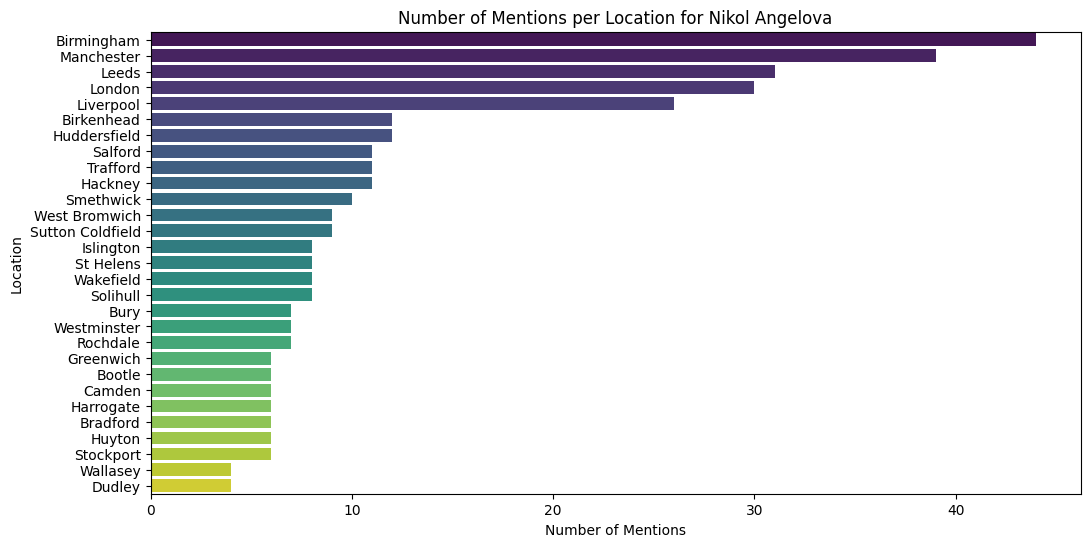

In [ ]:
import pandas as pd

# Aggregate locations into a single list
all_locations = relevant_tweets_df['sighting_locations'].explode()

# Count the frequency of each location
location_counts = all_locations.value_counts()

# Convert the Series to a DataFrame for easier handling
location_counts_df = location_counts.reset_index()
location_counts_df.columns = ['Location', 'Count']

import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart of location counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Location', data=location_counts_df, palette='viridis')

plt.title('Number of Mentions per Location for Nikol Angelova')
plt.xlabel('Number of Mentions')
plt.ylabel('Location')
plt.show()


# Temporal Pattern of Sightings

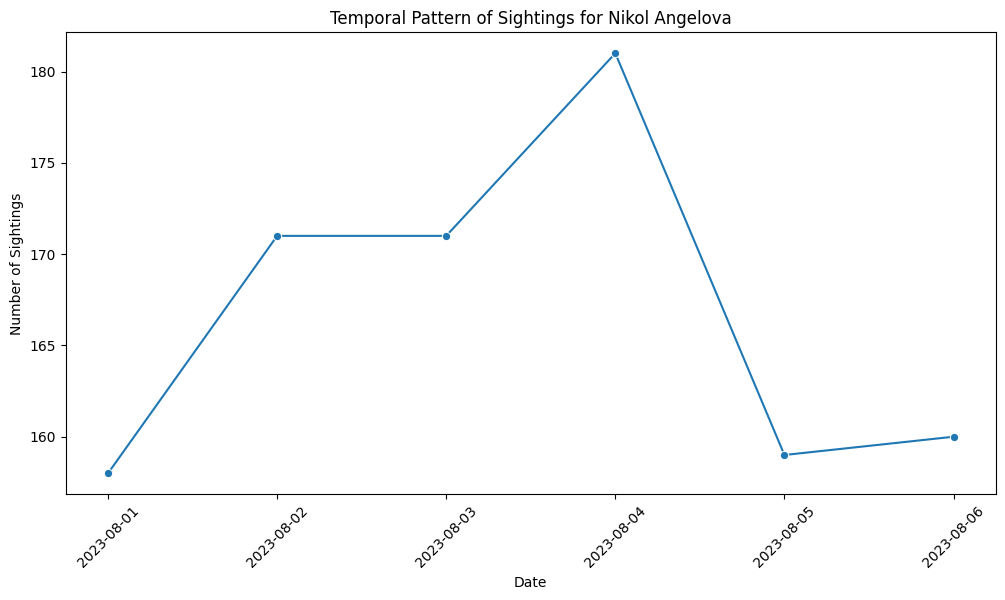

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the date format is something like 'Fri Aug 04 14:55:03 +0000 2023'
date_format = '%a %b %d %H:%M:%S %z %Y'

# Convert the 'created_at' column to datetime format with the specified format
relevant_tweets_df['created_at'] = pd.to_datetime(relevant_tweets_df['created_at'], format=date_format)

# Extract the date from the 'created_at' column
relevant_tweets_df['date'] = relevant_tweets_df['created_at'].dt.date

# Count the number of sightings per day
daily_counts = relevant_tweets_df.groupby('date').size().reset_index(name='Count')

# Plot the temporal pattern of sightings
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Count', data=daily_counts, marker='o')

plt.title('Temporal Pattern of Sightings for Nikol Angelova')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()


# Heatmap for Sighting Mentions

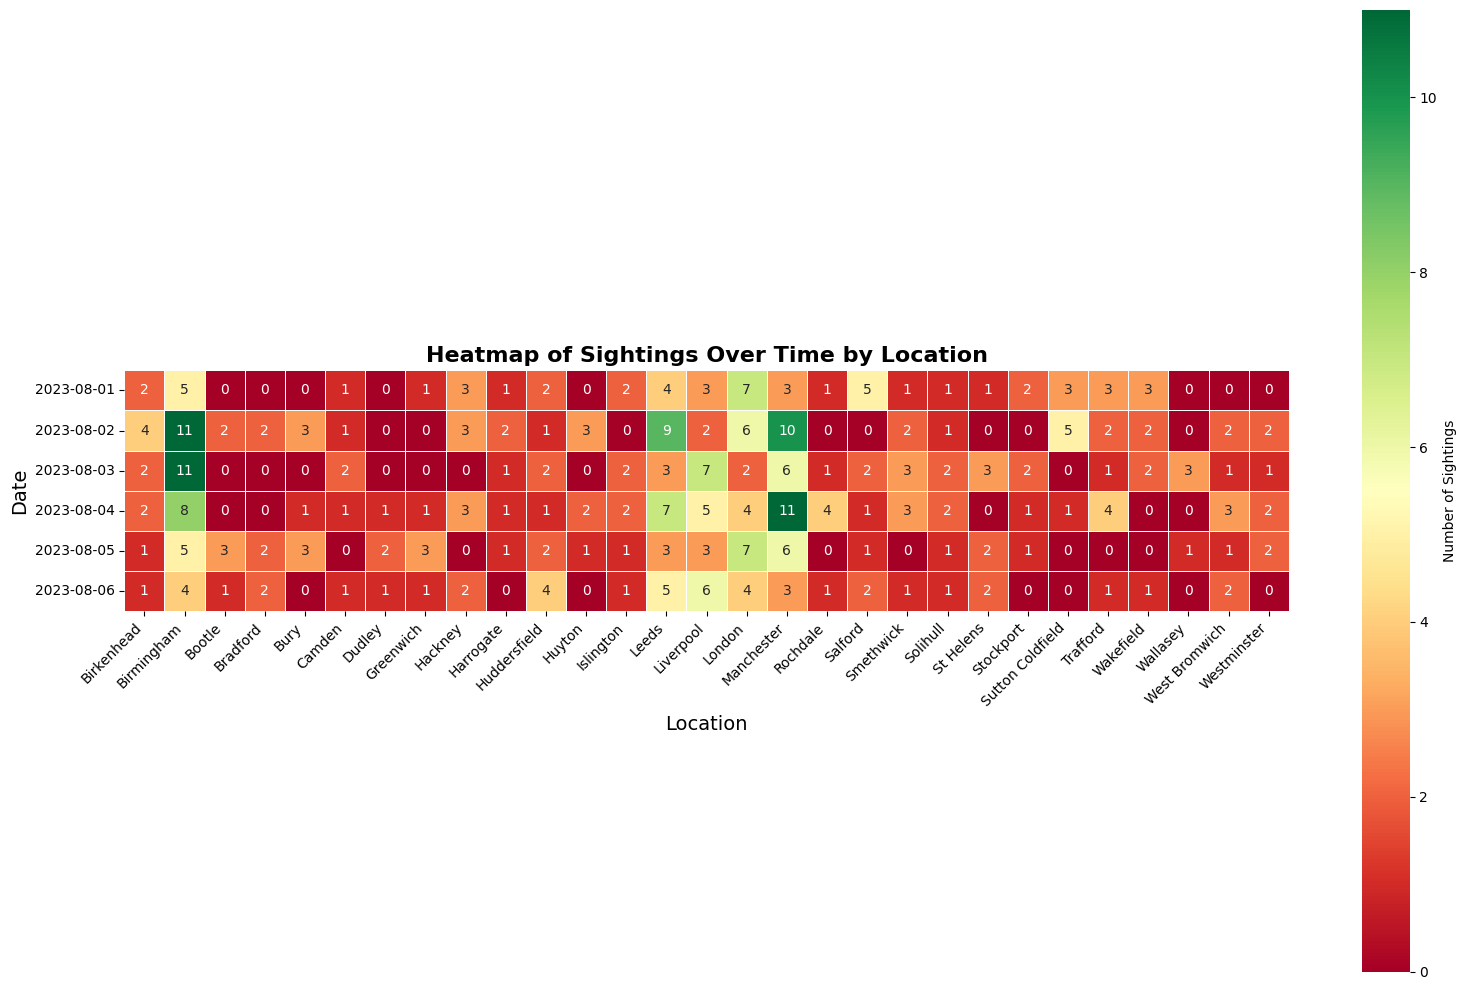

In [ ]:
# Explode the 'location_time' to get separate rows for each location and time
sightings_exploded = sightings_df.explode('location_time')

# Extract 'date' and 'locations' from the 'location_time' tuples
sightings_exploded['date'] = sightings_exploded['location_time'].apply(lambda x: x[1] if pd.notnull(x) else None)
sightings_exploded['locations'] = sightings_exploded['location_time'].apply(lambda x: x[0] if pd.notnull(x) else None)

date_format = '%a %b %d %H:%M:%S %z %Y'

sightings_exploded['date'] = pd.to_datetime(sightings_exploded['date'], format=date_format).dt.date

# Drop rows with missing date or location
sightings_exploded.dropna(subset=['date', 'locations'], inplace=True)

# Group by date and location and count the number of occurrences
time_location_counts = sightings_exploded.groupby(['date', 'locations']).size().reset_index(name='Count')

# Pivot the data to have dates as rows and locations as columns
time_location_pivot = time_location_counts.pivot(index='date', columns='locations', values='Count').fillna(0)

# Create a heatmap with a Green-Red color palette
plt.figure(figsize=(16, 10))
sns.heatmap(
    time_location_pivot,
    cmap='RdYlGn',  # Green-Red palette
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Number of Sightings'},
    square=True
)

# Title and labels
plt.title('Heatmap of Sightings Over Time by Location', fontsize=16, weight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Date', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# NER Analysis for PERSON/ORGANIZATION with SpaCy

In [ ]:
import spacy
import pandas as pd
import re
from nltk.corpus import wordnet as wn
import nltk

# Load necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load a pre-trained NER model (spaCy's 'en_core_web_sm' model includes NER)
nlp = spacy.load('en_core_web_sm')

# Load the dataset
relevant_tweets_df = final_df.copy()

# Function to expand keywords with synonyms using WordNet
def expand_keywords_with_synonyms(keywords):
    synonyms = set(keywords)
    for keyword in keywords:
        for syn in wn.synsets(keyword):
            for lemma in syn.lemmas():
                synonyms.add(lemma.name().replace('_', ' '))  # Replace underscores in multi-word synonyms
    return list(synonyms)

# Initial keywords (if needed)
keywords = ['company', 'organization', 'person', 'individual']

# Expand the keywords to include synonyms
expanded_keywords = expand_keywords_with_synonyms(keywords)

# Create a regex pattern for the expanded keywords
keywords_pattern = re.compile(r'\b(' + '|'.join(expanded_keywords) + r')\b', re.IGNORECASE)

# Function to split camel case (e.g., #JohnDoeMissing -> John Doe Missing)
def split_camel_case(hashtag):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', hashtag)

# Updated function to identify person and organization entities
def identify_person_org_entities(text):
    # Find all hashtags
    hashtags = re.findall(r'#\w+', text)

    # Split hashtags and add them to the text
    split_hashtags = ' '.join([split_camel_case(h) for h in hashtags])

    # Combine original text with split hashtags
    combined_text = text + ' ' + split_hashtags

    # Process combined text with SpaCy NER
    doc = nlp(combined_text)

    # Extract PERSON and ORG entities from text
    persons_orgs = [ent.text for ent in doc.ents if ent.label_ in ('PERSON', 'ORG')]

    return persons_orgs  # Return the list of identified entities

# Apply the function to identify person and organization entities in the tweets
relevant_tweets_df['identified_entities'] = relevant_tweets_df['full_text'].apply(identify_person_org_entities)

# Filter out only the rows where entities were identified (non-empty identified_entities)
entities_df = relevant_tweets_df[relevant_tweets_df['identified_entities'].apply(lambda x: len(x) > 0)].copy()

# Display the DataFrame with the filtered person and organization entities
print(entities_df[['full_text', 'identified_entities']])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                             full_text  \
0    Why should I care about #NikolAngelova? This i...   
1    Why should I care about #NikolAngelova? This i...   
2    Why should I care about #NikolAngelova? This i...   
3    Why should I care about #NikolAngelova? This i...   
4    Why should I care about #NikolAngelova? This i...   
..                                                 ...   
953  We're continuing the search for #NikolAngelova...   
954  We're continuing the search for #NikolAngelova...   
955  We're continuing the search for #NikolAngelova...   
956  We're continuing the search for #NikolAngelova...   
957  Please share this post and help us find #Nikol...   

                 identified_entities  
0    [NikolAngelova, Nikol Angelova]  
1    [NikolAngelova, Nikol Angelova]  
2    [NikolAngelova, Nikol Angelova]  
3    [NikolAngelova, Nikol Angelova]  
4    [NikolAngelova, Nikol Angelova]  
..                               ...  
953  [NikolAngelova, Nikol Ang

# NER Analysis with BERT for PERSON/ORGANIZATION /this function takes a long time to be generated, use the pre-run function as an example instead/

In [ ]:
!pip install transformers torch

from transformers import pipeline
import pandas as pd

ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="simple")

def extract_names(text):
    ner_results = ner_pipeline(text)
    names = [entity['word'] for entity in ner_results if entity['entity_group'] == 'PER']
    return names

final_df = pd.read_csv('new_predicted_tweets.csv')

final_df['identified_names'] = final_df['full_text'].apply(extract_names)

unique_names = set([name for sublist in final_df['identified_names'] for name in sublist])
print(unique_names)




config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

{'David', '##nge', 'NikolAnge', 'NikolAngelov', 'Nikol', 'Nik', 'NikolAngelova'}


# Frequency of Identified Names/Organisations in Tweets

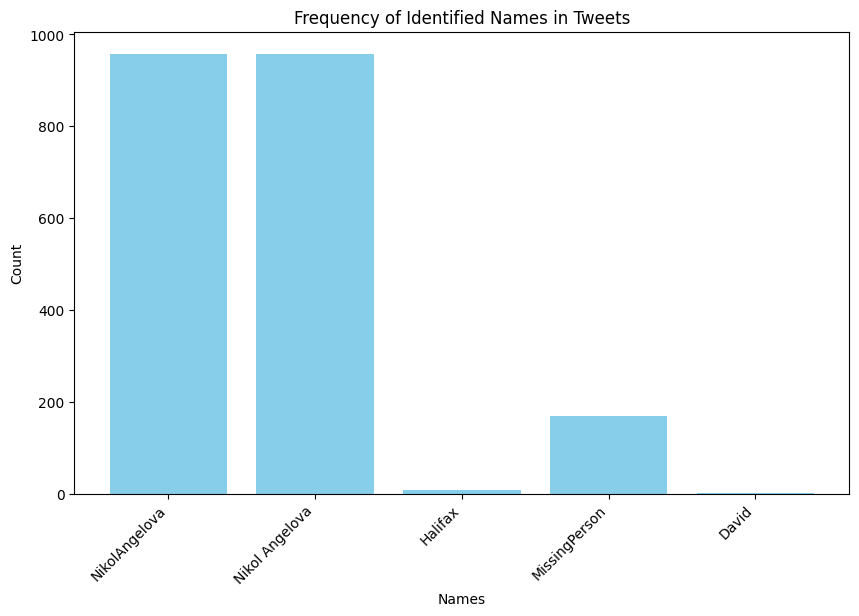

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten the list of identified names into a single list
all_names = [name for names in entities_df['identified_entities'] for name in names]

# Count the frequency of each name
name_counts = Counter(all_names)

# Convert the counts to a DataFrame for easier plotting
name_df = pd.DataFrame(name_counts.items(), columns=['Name', 'Count'])

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(name_df['Name'], name_df['Count'], color='skyblue')
plt.xlabel('Names')
plt.ylabel('Count')
plt.title('Frequency of Identified Names in Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

# Hashtags Analysis

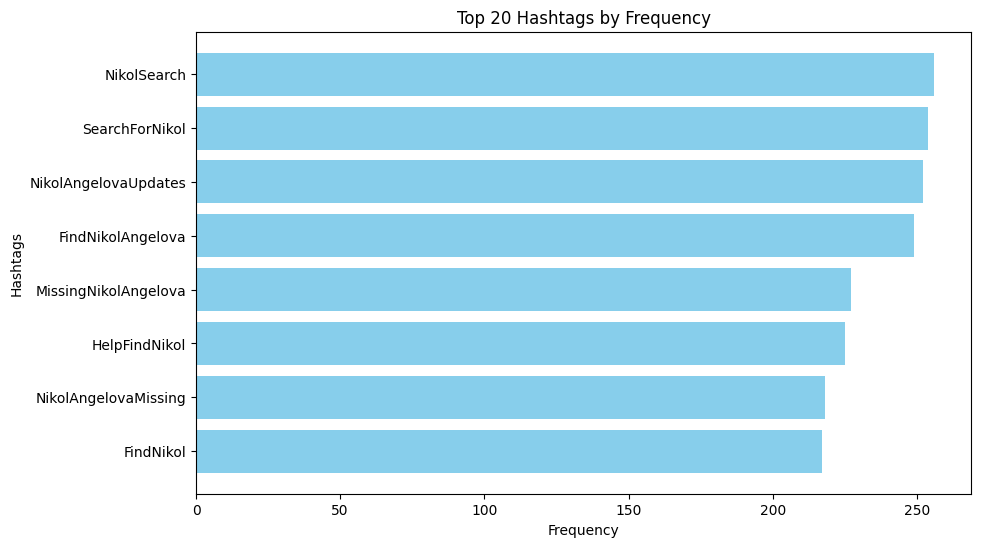

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the dataset
file_path = 'new_predicted_tweets.csv'
df = pd.read_csv(file_path)

# Step 1: Extract hashtags from the 'entities.hashtags' column
df['hashtags'] = df['entities.hashtags'].apply(lambda x: eval(x) if pd.notnull(x) else [])

# Flatten the list of hashtags
all_hashtags = [hashtag['text'] for hashtags in df['hashtags'] for hashtag in hashtags]

# Step 2: Count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags)

# Step 3a: Visualize the hashtag frequency with a bar chart
top_n = 20  # Display top 20 hashtags
top_hashtags = hashtag_counts.most_common(top_n)

hashtags, counts = zip(*top_hashtags)

plt.figure(figsize=(10, 6))
plt.barh(hashtags, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.title('Top 20 Hashtags by Frequency')
plt.gca().invert_yaxis()  # To display the highest counts on top
plt.show()




# Keywords Extraction and Analysis

In [ ]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
final_df = pd.read_csv('new_predicted_tweets.csv')
# Filter the DataFrame to only include relevant tweets
relevant_tweets_df = final_df[final_df['predicted_label'] == 1]
tweets = relevant_tweets_df['full_text']

# Preprocessing setup
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Updated preprocessing function
def preprocess(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)  # To remove entire hashtags
    # text = re.sub(r'#', '', text)  # To keep the hashtag word but remove the symbol

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

    return tokens

# Apply preprocessing to all tweets
tokens = tweets.apply(preprocess)

# Count the frequency of each word
all_words = [word for tweet in tokens for word in tweet]
word_freq = Counter(all_words)

# Step 6: Display the most common keywords
most_common = word_freq.most_common(20)
print("Most common keywords:", most_common)

# Bar Chart
words, counts = zip(*most_common)
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.title('Top 20 Keywords in Tweets')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency on top
plt.show()



# Top Liked and Top Retweed Posts /Open the generated HTML file to view/

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load the updated dataset
file_path = '/content/new_predicted_tweets.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame to include only relevant tweets (predicted_label = 1)
relevant_tweets = df[df['predicted_label'] == 1].copy()

# Extract relevant columns: full_text, retweet_count, favorite_count, and entities.urls
relevant_tweets.loc[:, 'url'] = relevant_tweets['entities.urls'].apply(lambda x: eval(x)[0]['expanded_url'] if x != '[]' else None)
df_relevant = relevant_tweets[['full_text', 'retweet_count', 'favorite_count', 'url']].copy()

# Convert retweet_count and favorite_count to integers using .loc
df_relevant.loc[:, 'retweet_count'] = df_relevant['retweet_count'].astype(int)
df_relevant.loc[:, 'favorite_count'] = df_relevant['favorite_count'].astype(int)

# Sort by retweet_count and favorite_count to get the top 10 tweets
top_retweeted = df_relevant.sort_values(by='retweet_count', ascending=False).head(10)
top_liked = df_relevant.sort_values(by='favorite_count', ascending=False).head(10)

# Convert DataFrames to HTML tables
top_retweeted_table = top_retweeted.to_html(index=False, classes='table table-striped', justify='left', escape=False)
top_liked_table = top_liked.to_html(index=False, classes='table table-striped', justify='left', escape=False)

# Create a styled HTML report
html_content = f"""
<html>
<head>
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 20px;
        }}
        h2 {{
            color: #4CAF50;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 20px;
        }}
        th, td {{
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        tr:nth-child(even) {{
            background-color: #f9f9f9;
        }}
        tr:hover {{
            background-color: #f1f1f1;
        }}
        .tweet-text {{
            max-width: 600px;
            word-wrap: break-word;
        }}
        .tweet-url {{
            color: #1DA1F2;
            text-decoration: none;
        }}
        .tweet-url:hover {{
            text-decoration: underline;
        }}
    </style>
</head>
<body>
    <h2>Top 10 Most Retweeted Relevant Tweets</h2>
    {top_retweeted_table}

    <h2>Top 10 Most Liked Relevant Tweets</h2>
    {top_liked_table}
</body>
</html>
"""

# Save the HTML report to a file
with open('/content/top_tweets_report.html', 'w') as f:
    f.write(html_content)

print("Report generated successfully: /content/top_tweets_report.html")
